In [54]:
import pandas as pd


In [55]:
reviews = pd.read_csv('../data/winemag-data_first1000.csv', index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"This is quite soft and pretty, a charming wine...",Vineyard Select,87,18.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Gresser
1,France,"A crisp, fresh Riesling that manages to be lea...",Le Dragon,86,34.0,Alsace,Alsace,NaN,Riesling,Josmeyer
2,US,"A medium bouquet of apple, lemon and a touch o...",Grand Cru,85,15.0,New York,North Fork of Long Island,Long Island,Chardonnay,Raphael
3,Argentina,"Aromas of blackberry, balsam wood, lemony oak ...",Reserva,90,24.0,Mendoza Province,Mendoza,NaN,Malbec,Sur de los Andes
4,Italy,"Aromas of wild flower, honey and peach charact...",Villa Luigia Millesimato Extra Dry,87,20.0,Veneto,Conegliano Valdobbiadene Prosecco Superiore,NaN,Glera,Il Follo


In [56]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      1000 non-null   object 
 1   description  1000 non-null   object 
 2   designation  678 non-null    object 
 3   points       1000 non-null   int64  
 4   price        919 non-null    float64
 5   province     1000 non-null   object 
 6   region_1     833 non-null    object 
 7   region_2     422 non-null    object 
 8   variety      1000 non-null   object 
 9   winery       1000 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 85.9+ KB


In [57]:
reviews.dropna(subset=['price'], inplace=True)


In [58]:
reviews.price.astype('Float64')

0       18.0
1       34.0
2       15.0
3       24.0
4       20.0
       ...  
995     29.0
996     25.0
997    190.0
998      9.0
999      7.0
Name: price, Length: 919, dtype: Float64

Plot the number of wines for each country.

Parameters:
- reviews (DataFrame): The DataFrame containing the wine reviews.

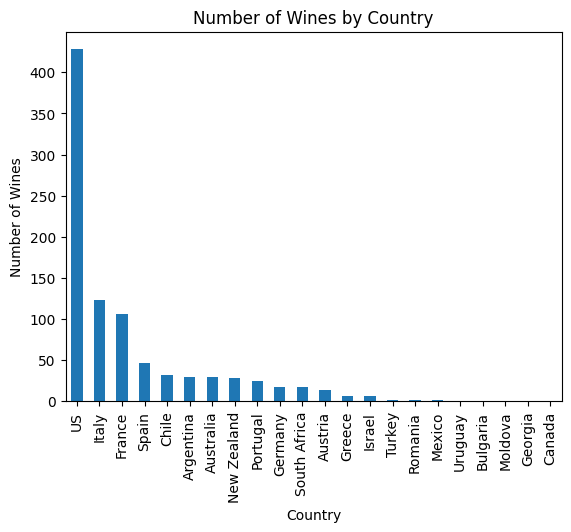

In [59]:
import matplotlib.pyplot as plt

# Count the number of wines for each country
country_counts = reviews['country'].value_counts()

# Plot the data
country_counts.plot(kind='bar')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.title('Number of Wines by Country')

# Show the plot
plt.show()


Bar chart that displays the average review points per country using Plotly. This chart will display each country on the x-axis and its corresponding average review points on the y-axis, with the bars colored based on the average review points.

Using Matplotllib

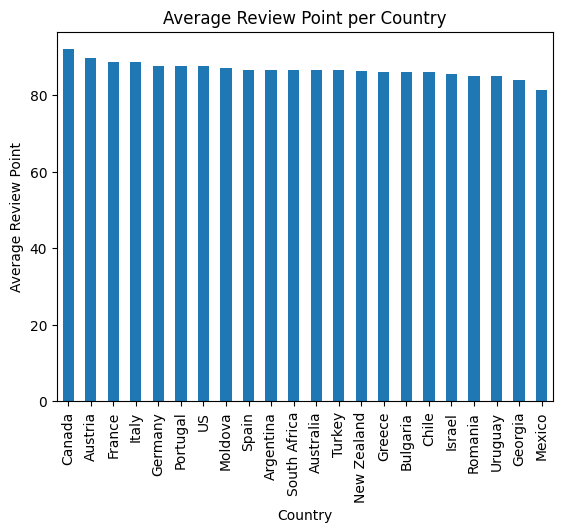

In [60]:
# Group the data by country and calculate the average review point
average_review_point = reviews.groupby('country')['points'].mean()

# Sort the data in descending order
average_review_point = average_review_point.sort_values(ascending=False)

# Plot the data
average_review_point.plot(kind='bar')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Average Review Point')
plt.title('Average Review Point per Country')

# Show the plot
plt.show()


Usind Plotly

In [61]:
import plotly.express as px

# Group the data by country and calculate the average review point
average_review_point = reviews.groupby('country')['points'].mean()

# Sort the data in descending order
average_review_point = average_review_point.sort_values(ascending=False)

# Create a new DataFrame
df = pd.DataFrame({'Country': average_review_point.index, 'AverageReviewPoint': average_review_point.values})

# Create a Plotly Plot
fig = px.bar(df, x='Country', y='AverageReviewPoint',
             color='AverageReviewPoint',
             title='Average Review Point per Country',
             labels={'AverageReviewPoint': 'Average Review Point'})

# Show the plot
fig.show()


The review_frequency is calculated by counting the occurrences of each country in the dataset. This frequency data is then added to the DataFrame and displayed in the plot as part of the hover data

In [62]:
import pandas as pd
import plotly.express as px

# Group the data by country and calculate the average review point
average_review_point = reviews.groupby('country')['points'].mean()

# Calculate the frequency of reviews for each country
review_frequency = reviews['country'].value_counts()

# Sort the data in descending order of average review points
average_review_point = average_review_point.sort_values(ascending=False)

# Create a new DataFrame combining both metrics
df = pd.DataFrame({
    'Country': average_review_point.index,
    'AverageReviewPoint': average_review_point.values,
    'ReviewFrequency': review_frequency[average_review_point.index].values  # Match order with average review points
})

# Create a Plotly Plot
fig = px.bar(df, x='Country', y='AverageReviewPoint',
             color='AverageReviewPoint',
             hover_data=['ReviewFrequency'],  # Display review frequency on hover
             title='Average Review Point and Review Frequency per Country',
             labels={'AverageReviewPoint': 'Average Review Point', 'ReviewFrequency': 'Review Frequency'})

# Show the plot
fig.show()


In [63]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group the data by country and calculate the average review point
average_review_point = reviews.groupby('country')['points'].mean()

# Calculate the frequency of reviews for each country
review_frequency = reviews['country'].value_counts()

# Sort the data in descending order of average review points
average_review_point = average_review_point.sort_values(ascending=False)

# Create a subplot with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add average review points bar chart
fig.add_trace(go.Bar(x=average_review_point.index, 
                     y=average_review_point.values, 
                     name='Average Review Point'), 
                     secondary_y=False)

# Add review frequency line chart with markers only
fig.add_trace(go.Scatter(x=review_frequency.index, 
                         y=review_frequency.values, 
                         name='Review Frequency', 
                         mode='markers'),
                         secondary_y=True)

# Set x-axis title
fig.update_xaxes(title_text="Country")

# Set y-axes titles
fig.update_yaxes(title_text="Average Review Point", secondary_y=False)
fig.update_yaxes(title_text="Review Frequency", secondary_y=True)

# Add plot title
fig.update_layout(title_text="Average Review Point and Review Frequency per Country")

# Show the plot
fig.show()

A bar chart that displays both the average review points and the frequency of reviews for each wine variety

In [64]:
import pandas as pd
import plotly.express as px

# Group the data by designation and calculate the average review point
average_review_point = reviews.groupby('variety')['points'].mean()

# Calculate the frequency of reviews for each designation
review_frequency = reviews['variety'].value_counts()

# Sort the data in descending order of average review points
average_review_point = average_review_point.sort_values(ascending=False)

# Create a new DataFrame combining both metrics
df = pd.DataFrame({
    'Designation': average_review_point.index,
    'AverageReviewPoint': average_review_point.values,
    'ReviewFrequency': review_frequency[average_review_point.index].values  # Match order with average review points
})

# Create a Plotly Plot
fig = px.bar(df, x='Designation', y='AverageReviewPoint',
             color='AverageReviewPoint',
             hover_data=['ReviewFrequency'],  # Display review frequency on hover
             title='Average Review Point and Review Frequency per Designation',
             labels={'AverageReviewPoint': 'Average Review Point', 'ReviewFrequency': 'Review Frequency'})

# Show the plot
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better visibility
fig.show()


Include only wine varieties that have more than 10 reviews

In [65]:
import pandas as pd
import plotly.express as px

# Calculate the frequency of reviews for each variety
review_frequency = reviews['variety'].value_counts()

# Filter out varieties with 10 or fewer reviews
varieties_with_enough_reviews = review_frequency[review_frequency > 10].index

# Filter the original DataFrame to include only those varieties
filtered_reviews = reviews[reviews['variety'].isin(varieties_with_enough_reviews)]

# Group the filtered data by variety and calculate the average review point
average_review_point = filtered_reviews.groupby('variety')['points'].mean()

# Sort the data in descending order of average review points
average_review_point = average_review_point.sort_values(ascending=False)

# Filter review_frequency to include only the selected varieties
review_frequency = review_frequency[average_review_point.index]

# Create a new DataFrame combining both metrics
df = pd.DataFrame({
    'Designation': average_review_point.index,
    'AverageReviewPoint': average_review_point.values,
    'ReviewFrequency': review_frequency.values  # Match order with average review points
})

# Create a Plotly Plot
fig = px.bar(df, x='Designation', y='AverageReviewPoint',
             color='AverageReviewPoint',
             hover_data=['ReviewFrequency'],  # Display review frequency on hover
             title='Average Review Point and Review Frequency per Designation for Varieties with More Than 10 Reviews',
             labels={'AverageReviewPoint': 'Average Review Point', 'ReviewFrequency': 'Review Frequency'})

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better visibility
fig.show()

In [66]:

import plotly.express as px


# Create a scatter plot
fig = px.scatter(reviews, x='price', y='points', 
                 hover_data=['country', 'variety', 'winery'], # Add more details on hover
                 title='Wine Reviews: Points vs. Price',
                 labels={'price': 'Price ($)', 'points': 'Points (1-100)'}, 
                 color='points', # Color points based on their score
                 size='price', # Size points based on their price for better visibility of price distribution
                 trendline='ols') # Add a trendline to see the overall relationship

# Show the plot
fig.show()
